In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 50)
import requests
import json
import time
import random

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [13]:
compiled_list = []

#def page
try:
    file = open('data/tmdbdata.json', 'r')
    compiled_list = json.load(file)
    file.close()
except:
    for n in tqdm(list(range(1,399))):
        url='https://api.themoviedb.org/3/movie/top_rated?api_key=0e72c0b2b11293a6390e9f7b472aec2b&language=en-US&page={}'.format(n)
        r = requests.get(url)
        data = r.json()
        compiled_list.append(data)
        time.sleep(random.choice([1,2]))
    
    file = open('data/tmdbdata.json', 'w')
    json.dump(compiled_list, file)
    file.close()

ipykernel_launcher:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


FileNotFoundError: [Errno 2] No such file or directory: 'data/tmdbdata.json'

In [ ]:
movies = []
for page in compiled_list:
    movies += page['results']
movies[0]

In [5]:
df = pd.DataFrame(movies)
df.head()

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path
0,13.381,724089,False,923,8.9,Gabriel's Inferno Part II,2020-07-31,en,Gabriel's Inferno Part II,[10749],/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg,False,Professor Gabriel Emerson finally learns the t...,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg
1,11.889,696374,False,1537,8.8,Gabriel's Inferno,2020-05-29,en,Gabriel's Inferno,[10749],/969BfPHGJcjg2aUv60g5uiiXFzf.jpg,False,An intriguing and sinful exploration of seduct...,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg
2,20.264,644479,False,256,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[35, 18]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg
3,46.486,278,False,17488,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[18, 80]",/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,False,Framed in the 1940s for the double murder of h...,/5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg
4,15.847,19404,False,2419,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[35, 18, 10749]",/svYzz6A6xleZv5toTLAhigXd1DX.jpg,False,"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg


# Genre

In [6]:
genre = {28: 'Action', 12: "Adventure", 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

In [7]:
genre

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [8]:
for g_id in df['genre_ids']:
    for g in g_id:
        if g not in genre.keys():
            print(g)

In [9]:
df['genre_ids'] = df['genre_ids'].apply(lambda g_id: [genre[g] for g in g_id])

In [10]:
df['genre_ids']

0                               [Romance]
1                               [Romance]
2                         [Comedy, Drama]
3                          [Drama, Crime]
4                [Comedy, Drama, Romance]
                      ...                
7955    [Comedy, Science Fiction, Family]
7956                    [Comedy, Western]
7957          [Action, Adventure, Comedy]
7958                             [Horror]
7959                             [Comedy]
Name: genre_ids, Length: 7960, dtype: object

In [11]:
df.dropna(subset = ['vote_average'])

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path
0,13.381,724089,False,923,8.9,Gabriel's Inferno Part II,2020-07-31,en,Gabriel's Inferno Part II,[Romance],/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg,False,Professor Gabriel Emerson finally learns the t...,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg
1,11.889,696374,False,1537,8.8,Gabriel's Inferno,2020-05-29,en,Gabriel's Inferno,[Romance],/969BfPHGJcjg2aUv60g5uiiXFzf.jpg,False,An intriguing and sinful exploration of seduct...,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg
2,20.264,644479,False,256,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[Comedy, Drama]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg
3,46.486,278,False,17488,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[Drama, Crime]",/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,False,Framed in the 1940s for the double murder of h...,/5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg
4,15.847,19404,False,2419,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[Comedy, Drama, Romance]",/svYzz6A6xleZv5toTLAhigXd1DX.jpg,False,"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955,10.794,22345,False,226,3.8,Baby Geniuses,1999-03-12,en,Baby Geniuses,"[Comedy, Science Fiction, Family]",/ixEuNI782ChcUt203PESBHYnRxH.jpg,False,"Scientist hold talking, super-intelligent babi...",/x7rB8xIJda2EcORq4Z7p8DWMC9F.jpg
7956,8.467,10870,False,228,3.8,Lucky Luke and the Daltons,2004-11-08,fr,Les Dalton,"[Comedy, Western]",/ymKO6XO8MAeXToLHoduOjgVtuam.jpg,False,Joe and Averell are the eldest and youngest of...,/mWQR9eGbf9dTiceypaGKmVXzRVE.jpg
7957,15.628,9760,False,974,3.8,Epic Movie,2007-01-25,en,Epic Movie,"[Action, Adventure, Comedy]",/mSZog2CLzXBBItsWq3sPt6WH9rf.jpg,False,"When Edward, Peter, Lucy and Susan each follow...",/l0lGJiTzU2Ce6T31DIRWv7I0kaC.jpg
7958,9.976,26914,False,253,3.7,Troll 2,1990-10-12,en,Troll 2,[Horror],/AsjEwOxebU1AF040QjfMkE8lskK.jpg,False,When young Joshua learns that he will be going...,/eFth6zw4PEInzr2Y64mYVN1zbBi.jpg


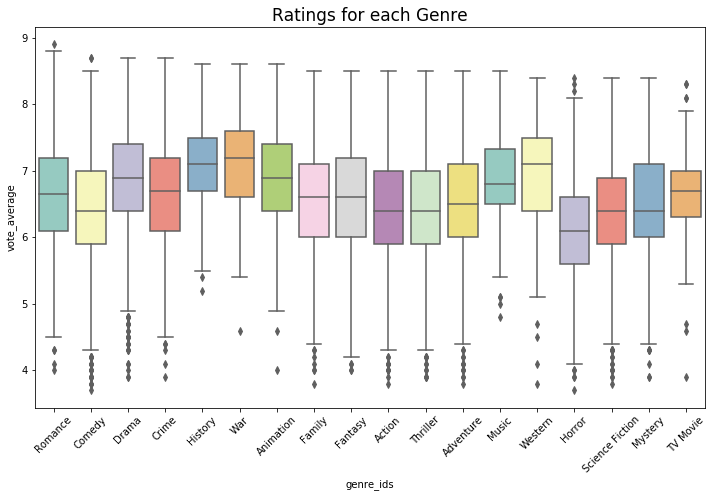

In [12]:
df = df.explode('genre_ids')
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(x="genre_ids", y = "vote_average", data = df, palette="Set3")
plt.xticks(rotation=45)
plt.title('Ratings for each Genre', fontsize = 17)

plt.savefig('genres_rating_boxplot')